# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 본인의 구글 드라이브에 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Argumentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)


## 1.환경설정 

### (1) 데이터셋 폴더 생성
- **세부요구사항**
    - C드라이브에 Datasets라는 폴더를 만드세요.
        - 구글드라이브를 사용하는경우 드라이브 첫 화면에 Datasets 라는 폴더를 만드세요. ('/content/drive/MyDrive/Datasets/')
    - 해당 폴더 안에 Car_Images.zip 파일을 넣으세요.

* 구글 Colab을 이용하는 경우

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 데이터셋 불러오기 
- **세부요구사항**
    - Car_Images.zip 파일을 C:/Datasets/ 경로에 압축 해제합니다.
    - zipfile 모듈을 이용하거나 다른 방식을 사용해도 됩니다.
        - 참고 자료 : [zipfile document](https://docs.python.org/3/library/zipfile.html#zipfile-objects)
    - 폴더구조(로컬)
        * C:/Datasets/ : 압축파일
        * C:/Datasets/Car_Images_train/ : 압축 해제한 이미지 저장소
    - 폴더구조(구글드라이브브)
        * /content/drive/MyDrive/Datasets/ : 압축파일
        * /content/drive/MyDrive/Datasets/Car_Images_train/ : 압축 해제한 이미지 저장소
    - 압축을 해제하면 다음과 같은 두 하위 폴더가 생성됩니다.
        * normal, abnormal : 각 폴더에는 이미지들이 있습니다.
        * 이후 단계에서 해당 경로로 부터 validation, test 셋을 추출하게 됩니다.
        

In [2]:
dataset_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/Datasets/'

In [35]:
import zipfile

In [7]:
# 압축파일 경로
# 구글 드라이브인 경우 경로에 맞게 지정하세요.
# dataset_path  = '/content/drive/MyDrive/Datasets/'
# dataset_path = 'C:/Datasets/'
dataset_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/Datasets/'

file_path = dataset_path + 'Car_Images.zip'

In [50]:
# 압축 해제
data = zipfile.ZipFile(file_path)
data.extractall(dataset_path + 'Car_Images_train')

### (3) 이미지 저장을 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 을 위해 각각 하위 폴더 normal과 abnormal를 준비합니다.
        - train
            * 정상 이미지 저장소 : C:/Datasets/Car_Images_train/normal/ 
                * 구글드라이브 :   /content/drive/MyDrive/Datasets/Car_Images_train/normal/
            * 파손 이미지 저장소 : C:/Datasets/Car_Images_train/abnormal/
                * 구글드라이브 : /content/drive/MyDrive/Datasets/Car_Images_train/abnormal/
        - val, test 역시 동일한 구조로 생성합니다.
    - 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
        - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [51]:
import os
# 각각 경로 지정
train_path = dataset_path + 'Car_Images_train'
tr_n_path = train_path + '/normal'
tr_ab_path = train_path + '/abnormal'
val_path = dataset_path + 'Car_Images_val'
test_path = dataset_path + 'Car_Images_test'

# train 폴더는 압축을 해제하면서 이미 생성 되어 있습니다.

# test 폴더 만들기 os.mkdir()
if not os.path.exists(test_path):
    os.mkdir(test_path)
    os.mkdir(test_path + '/normal')
    os.mkdir(test_path + '/abnormal')


# validation 폴더 만들기
if not os.path.exists(val_path):
    os.mkdir(val_path)
    os.mkdir(val_path + '/normal')
    os.mkdir(val_path + '/abnormal')

## 2.데이터 전처리

### (1) 데이터 분할 : Training set | Validation set | Test set 생성
- **세부요구사항**
    - Training set, Validation set, Test set을 만듭니다.
        * size
            * test : 전체에서 20%를 추출합니다.
            * validation : test를 떼어낸 나머지에서 다시 20%를 추출합니다.
        * 데이터는 랜덤하게 추출해야 합니다.
            - random, shutil 모듈을 이용하여 랜덤하게 추출할 수 있습니다.
                - [random document](https://docs.python.org/3/library/random.html) | [shutil document](https://docs.python.org/3/library/shutil.html)
            * 해당 모듈 이외에 자신이 잘 알고 있는 방법을 사용해도 됩니다.
---

#### 1) test, validation 크기를 지정

In [2]:
import random, shutil

In [53]:
# 전체 이미지 갯수를 확인합니다.
len(os.listdir(tr_n_path)) , len(os.listdir(tr_ab_path))

(302, 303)

In [54]:
# test 사이즈 : 전체 이미지의 20%
te_data_num = [round(len(os.listdir(tr_n_path))*0.2), round(len(os.listdir(tr_ab_path))*0.2)]
print(te_data_num)

# validation 사이즈 : test를 제외한 나머지 중에서 20%
val_data_num = [ round((len(os.listdir(tr_n_path))-te_data_num[0])*0.2) , round((len(os.listdir(tr_n_path))-te_data_num[1])*0.2) ]
print(val_data_num)

# train 사이즈
train_data_num = [len(os.listdir(tr_n_path)) - te_data_num[0] - val_data_num[0],
                  len(os.listdir(tr_ab_path))- te_data_num[1] - val_data_num[1]]

[60, 61]
[48, 48]


#### 2) test 셋 추출, validation 셋 추출

In [55]:
len(os.listdir(tr_n_path))

302

In [56]:
random.seed(2023)

# test set
tr_n_len = len(os.listdir(tr_n_path))
for _ in range(te_data_num[0]): # test normal
    rn = random.randrange(0, tr_n_len)
    filename = os.listdir(tr_n_path)[rn]
    shutil.move(os.path.join(tr_n_path, filename), os.path.join(test_path, 'normal', filename))
    tr_n_len -= 1

tr_ab_len = len(os.listdir(tr_ab_path))
for _ in range(te_data_num[1]): # test abnormal
    rn = random.randrange(0, tr_ab_len)
    filename = os.listdir(tr_ab_path)[rn]
    shutil.move(os.path.join(tr_ab_path, filename), os.path.join(test_path, 'abnormal', filename))
    tr_ab_len -= 1

# validation set
tr_n_len = len(os.listdir(tr_n_path))
for _ in range(val_data_num[0]): # validation normal
    rn = random.randrange(0, tr_n_len)
    filename = os.listdir(tr_n_path)[rn]
    shutil.move(os.path.join(tr_n_path, filename), os.path.join(val_path, 'normal', filename))
    tr_n_len -= 1

tr_ab_len = len(os.listdir(tr_ab_path))
for _ in range(val_data_num[1]): # test abnormal
    rn = random.randrange(0, tr_ab_len)
    filename = os.listdir(tr_ab_path)[rn]
    shutil.move(os.path.join(tr_ab_path, filename), os.path.join(val_path, 'abnormal', filename))
    tr_ab_len -= 1

In [57]:
# 추출 후 이미지 갯수 확인
print("train_normal", len(os.listdir(tr_n_path)))
print("train_abnormal", len(os.listdir(tr_ab_path)))
print(train_data_num)

print("test_normal", len(os.listdir(os.path.join(test_path, 'normal'))))
print("test_abnormal", len(os.listdir(os.path.join(test_path, 'abnormal'))))
print(te_data_num)

print("val_normal", len(os.listdir(os.path.join(val_path, 'normal'))))
print("val_abnormal", len(os.listdir(os.path.join(val_path, 'abnormal'))))
print(val_data_num)

train_normal 194
train_abnormal 194
[194, 194]
test_normal 60
test_abnormal 61
[60, 61]
val_normal 48
val_abnormal 48
[48, 48]


### (2) 데이터 복사 및 이동
- **세부요구사항**
    - 분할된 데이터를 복사 이동합니다.
        - 새로운 폴더에 저장하는 데이터로 "3.모델링I"에서 사용합니다.
        - 기존 폴더는 "4.모델링II > (1) Data Augmentation"에서 사용합니다.
    - Training set | Validation set | Test set의 데이터를 **새로운 폴더**에 복사하세요.
        - 새로운 폴더 명
            * copy_images/trainset
            * copy_images/validset
            * copy_images/testset
        - 새로운 폴더에는 normal, abnormal 파일 모두를 복사합니다. 
            * 파일을 구분하기 위해 abnormal 파일들은 파일명 앞에 접두사 'ab_'를 붙입시다.
        - os, shutil 모듈을 활용하세요.

#### 1) abnormal 파일 복사

* 복사하기 : shutil.copytree()

In [58]:
shutil.copytree(train_path + '/abnormal', dataset_path + 'copy_images/trainset')
shutil.copytree(test_path + '/abnormal', dataset_path + 'copy_images/testset')
shutil.copytree(val_path + '/abnormal', dataset_path + 'copy_images/valset')

'/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/Datasets/copy_images/valset'

* abnormal 이미지 이름의 접두어 "ab_" 붙이기 : os.rename

In [59]:
path = os.path.join(dataset_path, 'copy_images/trainset')
for f in os.listdir(path): # train abnormal
    new_name = 'ab_' + f
    os.rename(os.path.join(path, f), os.path.join(path, new_name))

path = os.path.join(dataset_path, 'copy_images/testset')
for f in os.listdir(path): # test abnormal
    new_name = 'ab_' + f
    os.rename(os.path.join(path, f), os.path.join(path, new_name))

path = os.path.join(dataset_path, 'copy_images/valset')
for f in os.listdir(path): # validation abnormal
    new_name = 'ab_' + f
    os.rename(os.path.join(path, f), os.path.join(path, new_name))

#### 2) normal 파일 복사

In [64]:
path = train_path + '/normal'
for f in os.listdir(path):
    shutil.copy(os.path.join(path, f), os.path.join(dataset_path, 'copy_images/trainset'))

path = test_path + '/normal'
for f in os.listdir(path):
    shutil.copy(os.path.join(path, f), os.path.join(dataset_path, 'copy_images/testset'))

path = val_path + '/normal'
for f in os.listdir(path):
    shutil.copy(os.path.join(path, f), os.path.join(dataset_path, 'copy_images/valset'))

* 데이터 갯수 조회

In [70]:
print(len(os.listdir(dataset_path+'copy_images/trainset/')))
print(len(os.listdir(dataset_path+'copy_images/testset/')))
print(len(os.listdir(dataset_path+'copy_images/valset/')))

388
121
96


In [71]:
train_data_num, te_data_num, val_data_num

([194, 194], [60, 61], [48, 48])

## 3.모델링 I
* **세부요구사항**
    * 모델링을 위한 데이터 구조 만들기
        * x : 이미지를 array로 변환합니다.
        * y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

- **model1**
    - VGG16 구조 따라하기 + monitor=val_loss
- **model2**
    - model1과 구조 동일 + monitor=val_accuracy
- **model3**
    - inception 구조 따라하기 + monitor=val_loss
- **model4**
    - ResNet 구조 따라하기 + monitor=val_loss

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Model
from keras.layers import Input, Dense, Flatten, MaxPool2D, Conv2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Add, Concatenate

import matplotlib.pyplot as plt

### (1) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다. 
    * 이미지 파일을 불러와 train, valid, test 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

#### 1) 이미지 목록 만들기
* train, validation, test 폴더로 부터 이미지 목록을 생성합니다.

In [134]:
# 이미지 목록 저장
img_train_list = os.listdir(dataset_path+'copy_images/trainset/')
img_val_list = os.listdir(dataset_path+'copy_images/valset/')
img_test_list = os.listdir(dataset_path+'copy_images/testset/')

In [135]:
# 메모리, 처리시간을 위해서 이미지 크기 조정
img_size = 256 ## 사이즈 조정 가능

#### 2) 이미지들을 배열 데이터셋으로 만들기

In [136]:
img_to_array(load_img(dataset_path+'copy_images/trainset/' + img_train_list[0], target_size = (img_size, img_size))).shape

(256, 256, 3)

In [137]:
x_train = []
path = dataset_path+'copy_images/trainset/'
for f in img_train_list:
    x_train.append(img_to_array(load_img(path + f, target_size = (img_size, img_size))))

x_test = []
path = dataset_path+'copy_images/testset/'
for f in img_test_list:
    x_test.append(img_to_array(load_img(path + f, target_size = (img_size, img_size))))

x_val = []
path = dataset_path+'copy_images/valset/'
for f in img_val_list:
    x_val.append(img_to_array(load_img(path + f, target_size = (img_size, img_size))))

In [138]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)

In [139]:
x_train.shape, x_test.shape, x_val.shape

((388, 256, 256, 3), (121, 256, 256, 3), (96, 256, 256, 3))

### (2) y : 클래스 만들기
- **세부요구사항**
    - Training set / Validation set / Test set의 y를 생성합니다.
        - 각각 normal, abnormal 데이터의 갯수를 다시 확인하고
        - normal을 0, abnormal을 1로 지정합니다.

In [140]:
# 데이터 갯수 확인
print( len(img_train_list) )
print( len([val for val in img_train_list if val.startswith('ab_')]) )
print('---')
print( len(img_val_list) )
print( len([val for val in img_val_list if val.startswith('ab_')]) )
print('---')
print( len(img_test_list) )
print( len([val for val in img_test_list if val.startswith('ab_')]) )

388
194
---
96
48
---
121
61


* y_train, y_valid, y_test 만들기
    * normal, abnormal 데이터의 갯수를 다시 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [141]:
y_train = [1 if f.startswith('ab_') else 0 for f in img_train_list]
y_val = [1 if f.startswith('ab_') else 0 for f in img_val_list]
y_test = [1 if f.startswith('ab_') else 0  for f in img_test_list]

In [142]:
y_train.count(1), y_val.count(1), y_test.count(1)

(194, 48, 61)

In [143]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [144]:
# shuffle
s = np.arange(x_train.shape[0])
np.random.shuffle(s)
x_train = x_train[s]
y_train = y_train[s]

s = np.arange(x_val.shape[0])
np.random.shuffle(s)
x_val = x_val[s]
y_val = y_val[s]

In [145]:
# scaling
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [146]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

### (3) 모델1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

#### 1) 구조 설계

In [23]:
# input : 280 x 280 x 3
# VGG 16과 비슷하게 해보기
# conv - conv - maxpool (64) 140
# conv - conv - maxpool (128) 70
# conv - conv - maxpool (256) 35
# conv - conv - maxpool (512) 17
# conv - conv - maxpool (512) 8
# dense(512)
# dropout(0.2)

# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(img_size, img_size, 3))
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(il)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

#### 2) 학습
* EarlyStopping 설정하고 학습시키기

In [24]:
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/checkpoints/'
# path = root_path + 'model1/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.2f}.h5'
path = root_path + 'model1/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [25]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10000, callbacks=[es, mc, lr_reduction])

Epoch 1/10000
13/13 [==============================] - 32s 810ms/step - loss: 0.7458 - accuracy: 0.5284 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10000
13/13 [==============================] - 7s 536ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10000
13/13 [==============================] - 7s 542ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10000
13/13 [==============================] - 7s 535ms/step - loss: 0.6935 - accuracy: 0.5206 - val_loss: 0.6927 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10000
13/13 [==============================] - 5s 410ms/step - loss: 0.6937 - accuracy: 0.5696 - val_loss: 0.6946 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/10000
13/13 [==============================] - 5s 410ms/step - loss: 0.6994 - accuracy: 0.4897 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/10000
13/13 [==============================

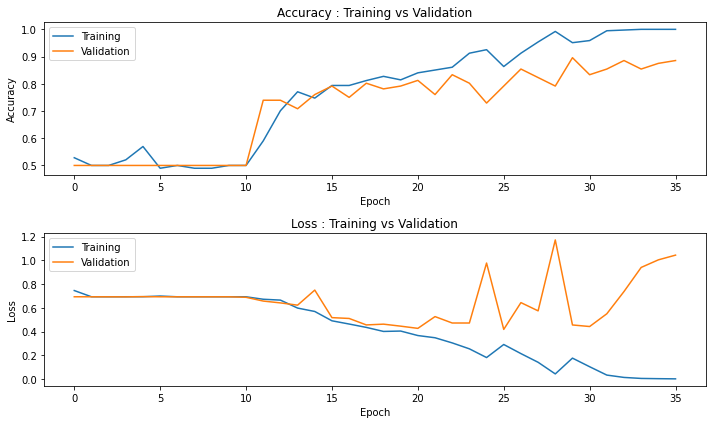

In [26]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

#### 3) test set으로 예측하고 평가하기
* 평가는 confusion_matrix, classification_report 활용

In [29]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 129ms/step - loss: 0.4841 - accuracy: 0.8017


[0.48413369059562683, 0.8016529083251953]

In [27]:
y_pred = model.predict(x_test)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)

4/4 [==============================] - 3s 953ms/step


In [28]:
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

[[45 15]
 [ 9 52]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        60
           1       0.78      0.85      0.81        61

    accuracy                           0.80       121
   macro avg       0.80      0.80      0.80       121
weighted avg       0.80      0.80      0.80       121



### (4) 모델2
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

#### 1) 구조 설계

In [30]:
# input : 280 x 280 x 3
# VGG 16과 비슷하게 해보기
# conv - conv - maxpool (64) 140
# conv - conv - maxpool (128) 70
# conv - conv - maxpool (256) 35
# conv - conv - maxpool (512) 17
# conv - conv - maxpool (512) 8
# dense(512)
# dropout(0.2)

# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(img_size, img_size, 3))
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(il)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model2 = Model(il, ol)

# 컴파일
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

#### 2) 학습
* EarlyStopping 설정하고 학습시키기

In [31]:
# 이번에는 monitor = val_accuracy로 해보기
es = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/checkpoints/'
# path = root_path + 'model2/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.2f}.h5'
path = root_path + 'model2/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_accuracy', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=0.000001)

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10000, callbacks=[es, mc, lr_reduction])

Epoch 1/10000
13/13 [==============================] - 7s 546ms/step - loss: 0.2053 - accuracy: 0.9356 - val_loss: 0.6351 - val_accuracy: 0.8125 - lr: 1.2500e-04
Epoch 2/10000
13/13 [==============================] - 5s 411ms/step - loss: 0.1465 - accuracy: 0.9407 - val_loss: 0.6320 - val_accuracy: 0.8125 - lr: 1.2500e-04
Epoch 3/10000
13/13 [==============================] - 6s 436ms/step - loss: 0.1122 - accuracy: 0.9536 - val_loss: 0.6275 - val_accuracy: 0.7917 - lr: 1.2500e-04
Epoch 4/10000
13/13 [==============================] - 6s 438ms/step - loss: 0.0687 - accuracy: 0.9820 - val_loss: 0.8622 - val_accuracy: 0.7812 - lr: 1.2500e-04
Epoch 5/10000
13/13 [==============================] - 5s 418ms/step - loss: 0.0455 - accuracy: 0.9897 - val_loss: 0.9372 - val_accuracy: 0.7917 - lr: 1.2500e-04
Epoch 6/10000
13/13 [==============================] - 5s 420ms/step - loss: 0.0341 - accuracy: 0.9948 - val_loss: 1.1358 - val_accuracy: 0.7708 - lr: 1.2500e-04
Epoch 7/10000
13/13 [=======

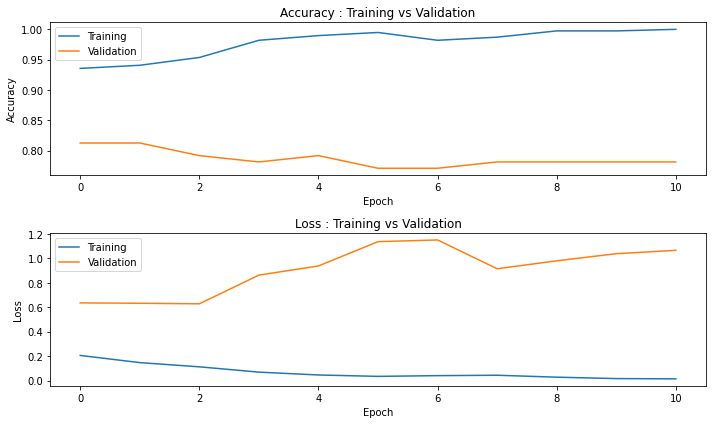

In [39]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

#### 3) test set으로 예측하고 평가하기
* 평가는 confusion_matrix, classification_report 활용

In [42]:
y_pred = model.predict(x_test)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

4/4 [==============================] - 0s 141ms/step
[[55  5]
 [21 40]]
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        60
           1       0.89      0.66      0.75        61

    accuracy                           0.79       121
   macro avg       0.81      0.79      0.78       121
weighted avg       0.81      0.79      0.78       121



In [41]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 118ms/step - loss: 0.5696 - accuracy: 0.7851


[0.5695916414260864, 0.7851239442825317]

### (5) 모델3
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

#### 1) 구조 설계

In [43]:
# input : 280 x 280 x 3
# Inception 과 비슷하게 해보기
# conv 3x3 32, same - batchnorm
# conv 3x3 64, same - batchnorm
# MaxPooling
# Dropout(0.2)
## 첫 번째 가지
# 32 1x1, stride=1, same
## 두 번째 가지
# 64 1x1, stride=1, same
# 64 3x3, stride=1, same
## 세 번째 가지
# 16 1x1, stride=1, same
# 16 5x5, stride=1, same
## 네 번째 가지
# MaxPooling 3x3, stride=1, same
# 16 1x1, stride=1, same

# concat(채널 기준)
# GlobalAveragePooling

# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(img_size, img_size, 3))
hl = Conv2D(32, (3, 3), activation='relu', padding='same')(il)
hl = BatchNormalization()(hl)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = BatchNormalization()(hl)
hl = MaxPool2D()(hl)
hl = Dropout(0.2)(hl)

# 첫 번째 가지
x1 = Conv2D(32, (1, 1), strides=(1, 1), activation='relu', padding='same')(hl)

# 두 번째 가지
x2 = Conv2D(64, (1, 1), strides=(1, 1), activation='relu', padding='same')(hl)
x2 = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same')(x2)

# 세 번째 가지
x3 = Conv2D(16, (1, 1), strides=(1, 1), activation='relu', padding='same')(hl)
x3 = Conv2D(16, (5, 5), strides=(1, 1), activation='relu', padding='same')(x3)

# 네 번째 가지
x4 = MaxPool2D((3, 3), strides=(1, 1), padding='same')(hl)
x4 = Conv2D(16, (1, 1), strides=(1, 1), activation='relu', padding='same')(x4)

hl = Concatenate()([x1, x2, x3, x4])
hl = BatchNormalization()(hl)

# 첫 번째 가지
x1 = Conv2D(32, (1, 1), strides=(1, 1), activation='relu', padding='same')(hl)

# 두 번째 가지
x2 = Conv2D(64, (1, 1), strides=(1, 1), activation='relu', padding='same')(hl)
x2 = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same')(x2)

# 세 번째 가지
x3 = Conv2D(16, (1, 1), strides=(1, 1), activation='relu', padding='same')(hl)
x3 = Conv2D(16, (5, 5), strides=(1, 1), activation='relu', padding='same')(x3)

# 네 번째 가지
x4 = MaxPool2D((3, 3), strides=(1, 1), padding='same')(hl)
x4 = Conv2D(16, (1, 1), strides=(1, 1), activation='relu', padding='same')(x4)

hl = Concatenate()([x1, x2, x3, x4])
hl = BatchNormalization()(hl)

# 첫 번째 가지
x1 = Conv2D(32, (1, 1), strides=(1, 1), activation='relu', padding='same')(hl)

# 두 번째 가지
x2 = Conv2D(64, (1, 1), strides=(1, 1), activation='relu', padding='same')(hl)
x2 = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same')(x2)

# 세 번째 가지
x3 = Conv2D(16, (1, 1), strides=(1, 1), activation='relu', padding='same')(hl)
x3 = Conv2D(16, (5, 5), strides=(1, 1), activation='relu', padding='same')(x3)

# 네 번째 가지
x4 = MaxPool2D((3, 3), strides=(1, 1), padding='same')(hl)
x4 = Conv2D(16, (1, 1), strides=(1, 1), activation='relu', padding='same')(x4)

hl = Concatenate()([x1, x2, x3, x4])
hl = BatchNormalization()(hl)

hl = GlobalAveragePooling2D()(hl)
ol = Dense(1, activation='sigmoid')(hl)

model3 = Model(il, ol)

model3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [44]:
from keras.utils import plot_model

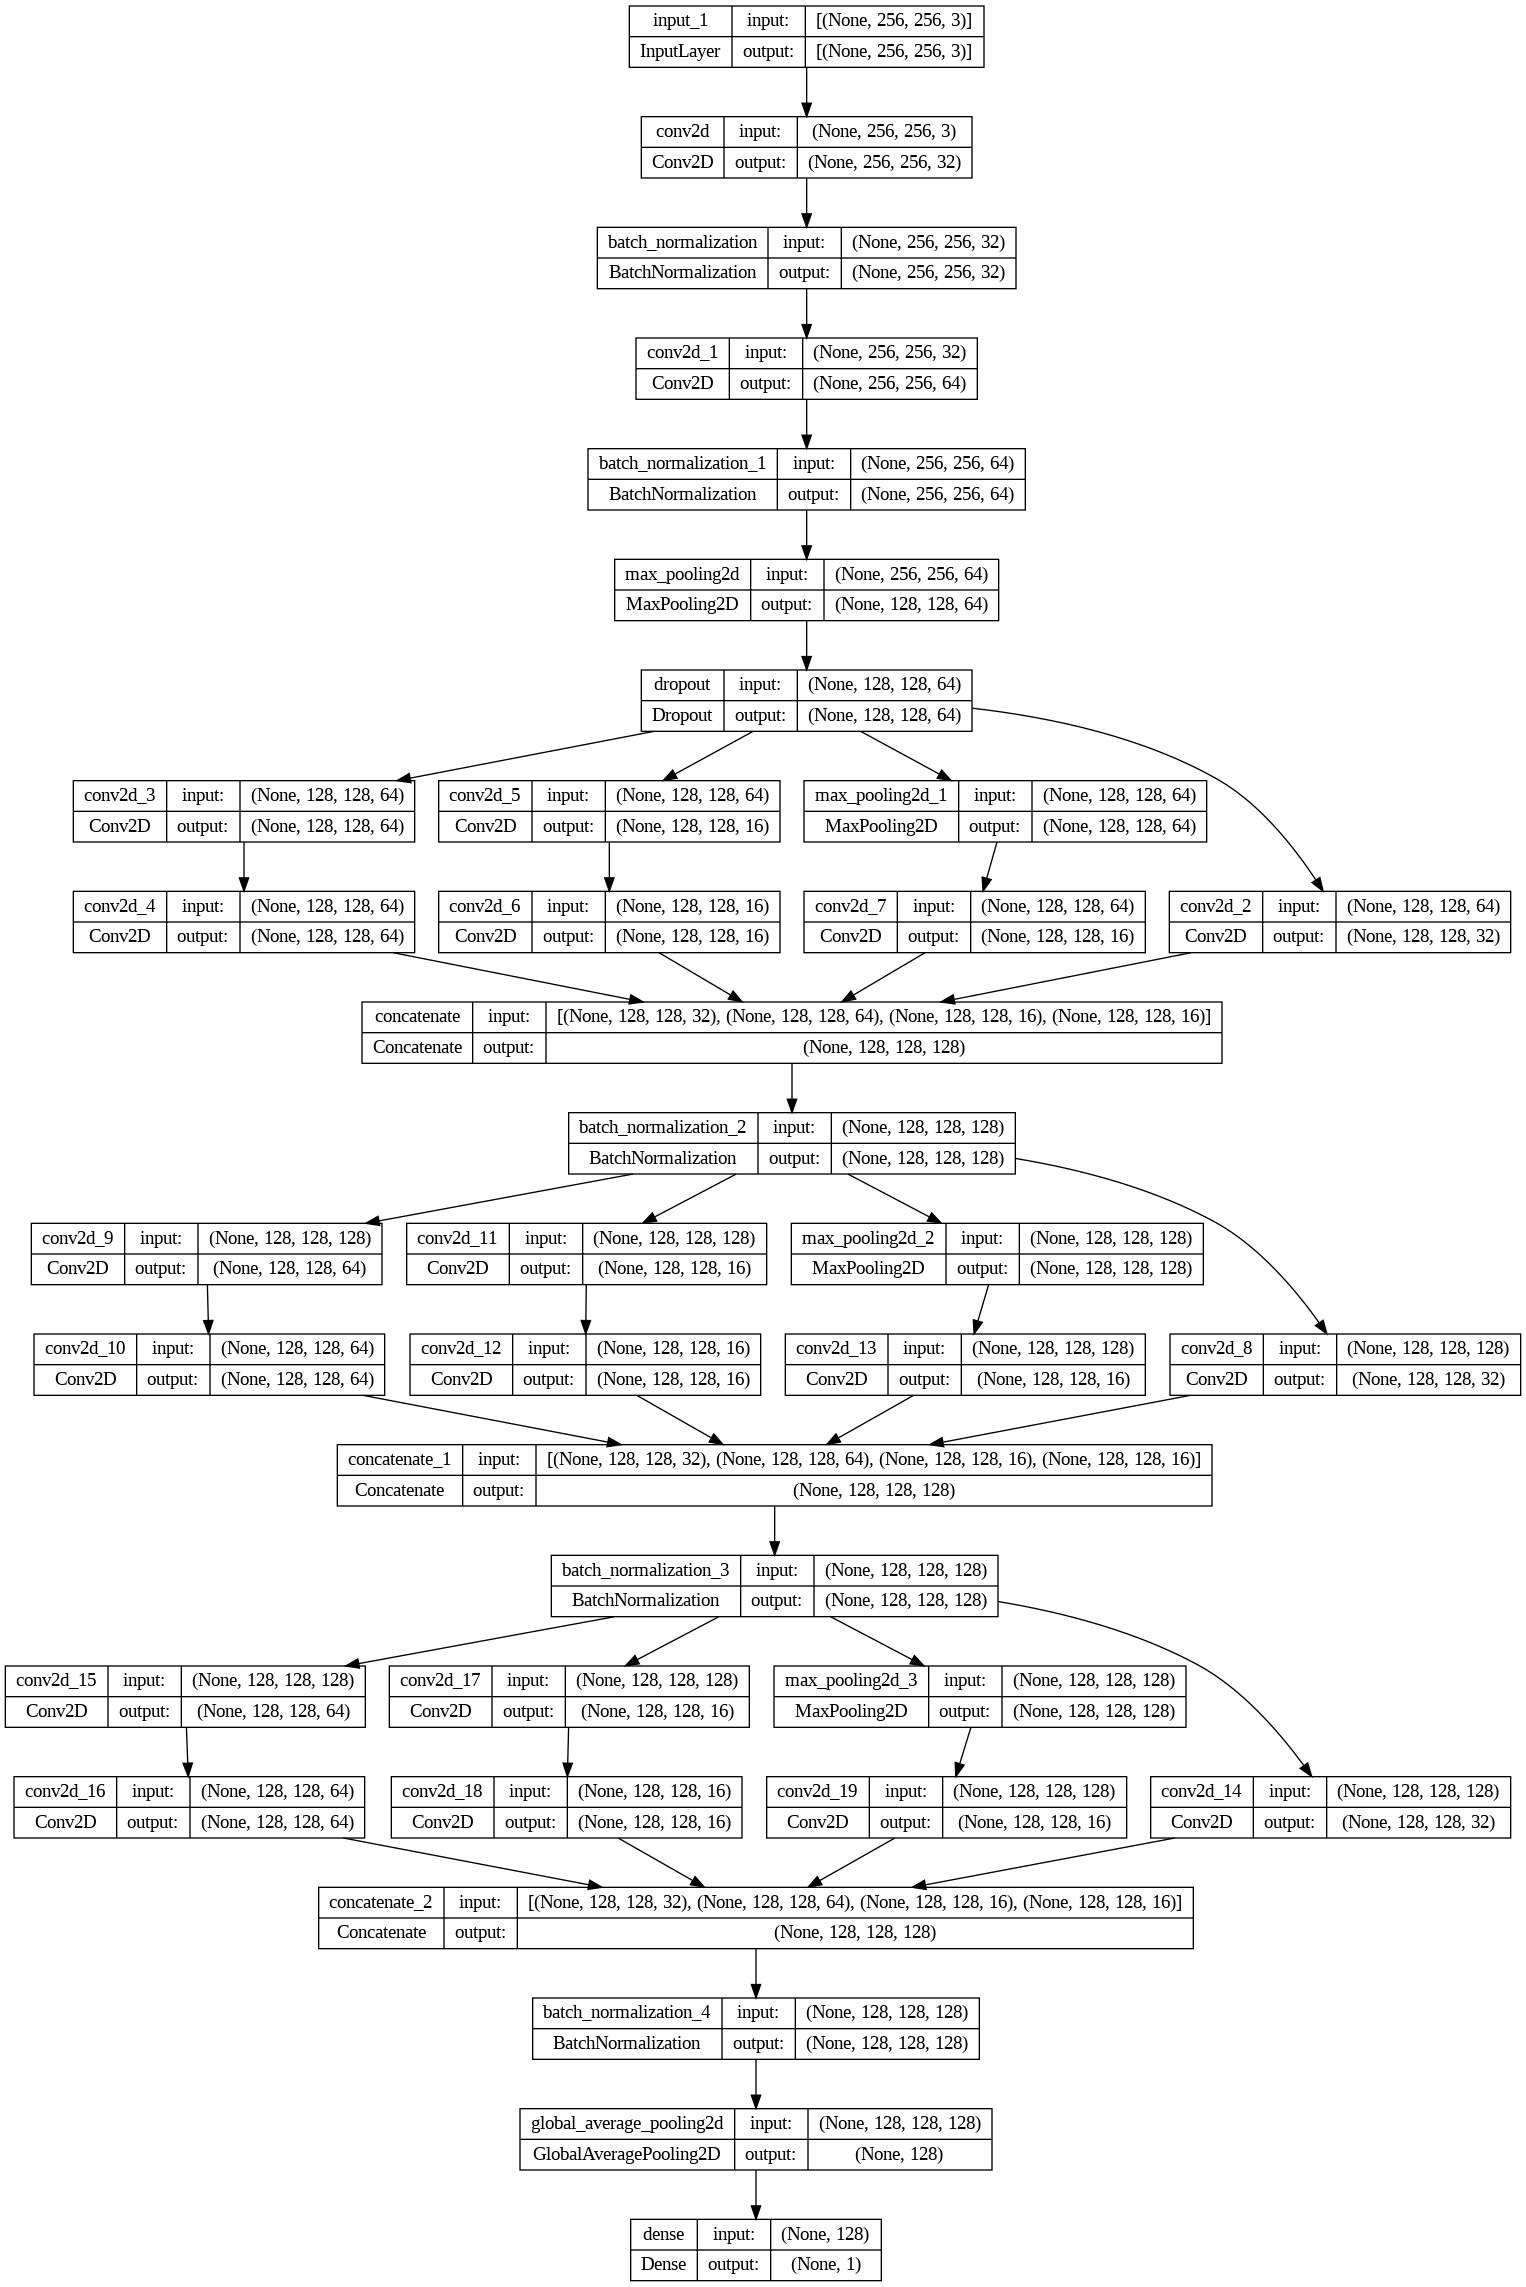

In [45]:
plot_model(model3, show_shapes=True)

#### 2) 학습
* EarlyStopping 설정하고 학습시키기

In [46]:
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/checkpoints/'
# path = root_path + 'model3/{epoch:02d}-{val_loss:.4f}-{val_loss:.2f}.h5'
path = root_path + 'model3/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [47]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10000, callbacks=[es, mc, lr_reduction])

Epoch 1/10000
13/13 [==============================] - 8s 606ms/step - loss: 0.1521 - accuracy: 0.9356 - val_loss: 0.5937 - val_accuracy: 0.8229 - lr: 3.1250e-05
Epoch 2/10000
13/13 [==============================] - 7s 541ms/step - loss: 0.1332 - accuracy: 0.9510 - val_loss: 0.5869 - val_accuracy: 0.8229 - lr: 3.1250e-05
Epoch 3/10000
13/13 [==============================] - 5s 411ms/step - loss: 0.1213 - accuracy: 0.9536 - val_loss: 0.5906 - val_accuracy: 0.8021 - lr: 3.1250e-05
Epoch 4/10000
13/13 [==============================] - 6s 437ms/step - loss: 0.1133 - accuracy: 0.9613 - val_loss: 0.6032 - val_accuracy: 0.8021 - lr: 3.1250e-05
Epoch 5/10000
13/13 [==============================] - 6s 440ms/step - loss: 0.0957 - accuracy: 0.9639 - val_loss: 0.6376 - val_accuracy: 0.8021 - lr: 3.1250e-05
Epoch 6/10000
13/13 [==============================] - 5s 418ms/step - loss: 0.0974 - accuracy: 0.9613 - val_loss: 0.6854 - val_accuracy: 0.8021 - lr: 3.1250e-05
Epoch 7/10000
13/13 [=======

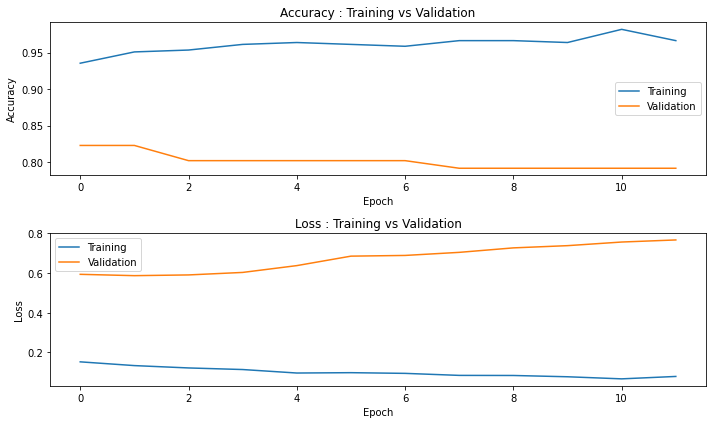

In [48]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

#### 3) test set으로 예측하고 평가하기
* 평가는 confusion_matrix, classification_report 활용

In [49]:
y_pred = model.predict(x_test)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

4/4 [==============================] - 0s 131ms/step
[[52  8]
 [18 43]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        60
           1       0.84      0.70      0.77        61

    accuracy                           0.79       121
   macro avg       0.79      0.79      0.78       121
weighted avg       0.79      0.79      0.78       121



In [50]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 124ms/step - loss: 0.5204 - accuracy: 0.7851


[0.5204150676727295, 0.7851239442825317]

### (6) 모델4

#### 1) 구조 설계

In [52]:
# Residual Connection 사용 해보기
# input : 280 x 280 x 3
# VGG 16과 비슷하게 해보기
# conv - conv - maxpool (64) 140
# conv - conv - maxpool (128) 70
# conv - conv - maxpool (256) 35
# conv - conv - maxpool (512) 17
# conv - conv - maxpool (512) 8
# dense(512)
# dropout(0.2)

# 세션 클리어
keras.backend.clear_session()

def residual_block(layer, filters):
    short_cut = layer
    short_cut = Conv2D(filters, (1, 1), padding='same')(short_cut)

    hl = Conv2D(filters, (3, 3), activation='relu', padding='same')(layer)
    hl = BatchNormalization()(hl)
    hl = Conv2D(filters, (3, 3), activation='relu', padding='same')(hl)
    hl = BatchNormalization()(hl)

    hl = Add()([hl, short_cut])
    return hl

# 모델 쌓기
il = Input(shape=(img_size, img_size, 3))

hl = residual_block(il, 64)
hl = residual_block(hl, 64)
hl = residual_block(hl, 64)
hl = MaxPool2D()(hl)

hl = residual_block(hl, 128)
hl = residual_block(hl, 128)
hl = residual_block(hl, 128)
hl = MaxPool2D()(hl)

hl = residual_block(hl, 256)
hl = residual_block(hl, 256)
hl = residual_block(hl, 256)
hl = MaxPool2D()(hl)

hl = residual_block(hl, 512)
hl = residual_block(hl, 512)
hl = residual_block(hl, 512)
hl = MaxPool2D()(hl)

hl = residual_block(hl, 512)
hl = residual_block(hl, 512)
hl = residual_block(hl, 512)
hl = MaxPool2D()(hl)

hl = GlobalAveragePooling2D()(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model4 = Model(il, ol)

# 컴파일
model4.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d_1[0][0]']               
 alization)                     )                                                             

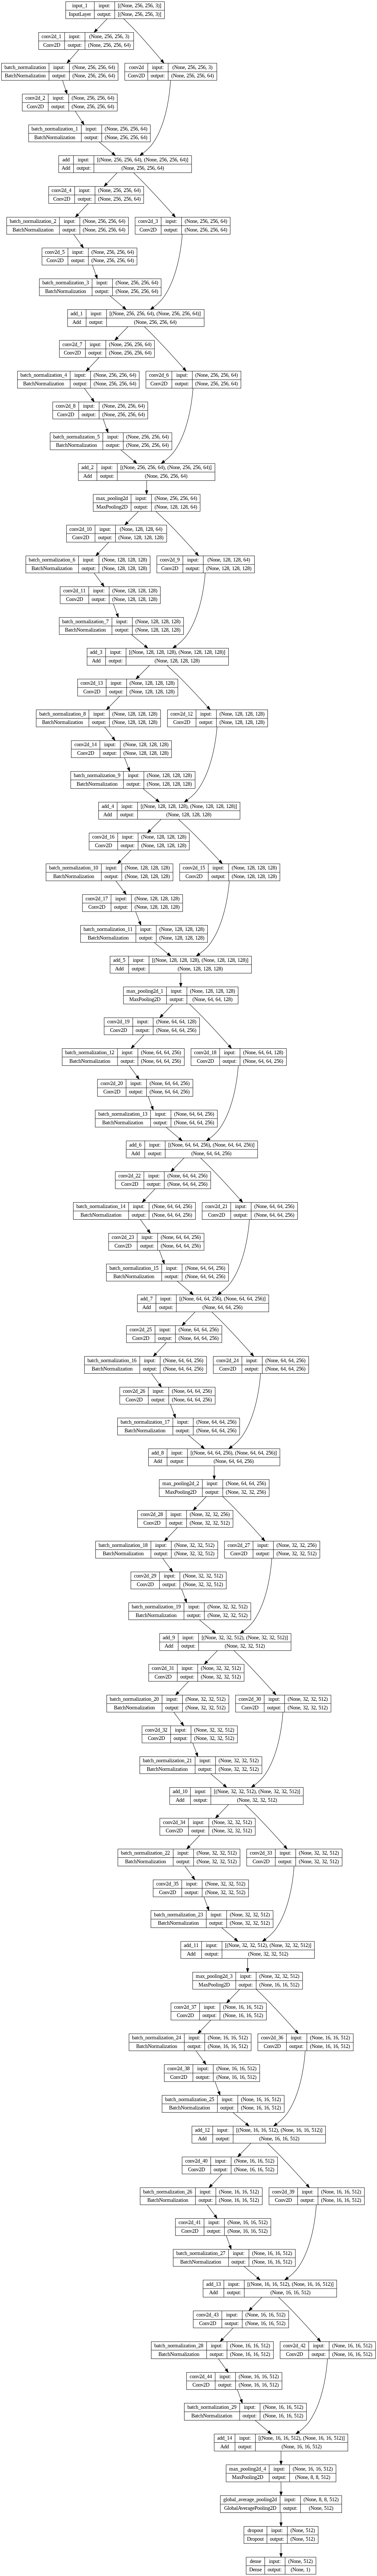

In [53]:
plot_model(model4, show_shapes=True)

#### 2) 학습

In [54]:
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/checkpoints/'
# path = root_path + 'model4/{epoch:02d}-{val_loss:.4f}-{val_loss:.2f}.h5'
path = root_path + 'model4/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [55]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                     epochs=10000, callbacks=[es, mc, lr_reduction], batch_size=16)

Epoch 1/10000
25/25 [==============================] - 20s 624ms/step - loss: 0.1276 - accuracy: 0.9510 - val_loss: 0.5945 - val_accuracy: 0.8229 - lr: 7.8125e-06
Epoch 2/10000
25/25 [==============================] - 5s 216ms/step - loss: 0.1200 - accuracy: 0.9536 - val_loss: 0.6027 - val_accuracy: 0.8229 - lr: 7.8125e-06
Epoch 3/10000
25/25 [==============================] - 6s 223ms/step - loss: 0.1132 - accuracy: 0.9588 - val_loss: 0.6173 - val_accuracy: 0.8229 - lr: 7.8125e-06
Epoch 4/10000
25/25 [==============================] - 6s 231ms/step - loss: 0.1102 - accuracy: 0.9588 - val_loss: 0.6271 - val_accuracy: 0.8229 - lr: 7.8125e-06
Epoch 5/10000
25/25 [==============================] - 6s 233ms/step - loss: 0.1086 - accuracy: 0.9613 - val_loss: 0.6394 - val_accuracy: 0.8021 - lr: 7.8125e-06
Epoch 6/10000
25/25 [==============================] - 6s 231ms/step - loss: 0.1029 - accuracy: 0.9588 - val_loss: 0.6469 - val_accuracy: 0.8021 - lr: 7.8125e-06
Epoch 7/10000
25/25 [======

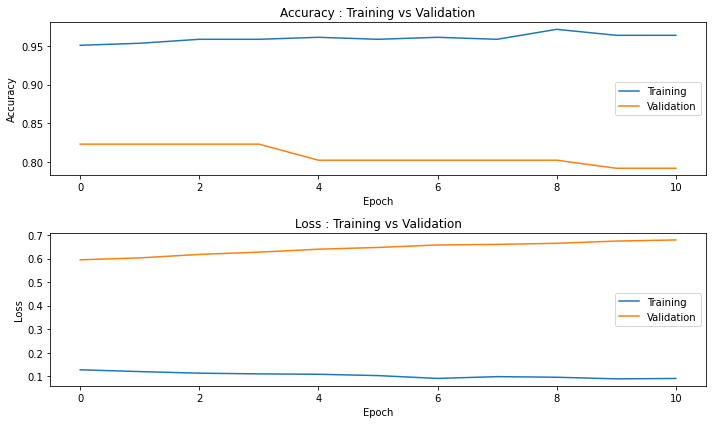

In [56]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

In [57]:
y_pred = model.predict(x_test)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

4/4 [==============================] - 0s 138ms/step
[[52  8]
 [16 45]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        60
           1       0.85      0.74      0.79        61

    accuracy                           0.80       121
   macro avg       0.81      0.80      0.80       121
weighted avg       0.81      0.80      0.80       121



In [58]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 117ms/step - loss: 0.5263 - accuracy: 0.8017


[0.526298463344574, 0.8016529083251953]

## 4.모델링 II
* **세부요구사항**
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Data Augmentation을 통해 데이터를 증가 시킵니다.
            - ImageDataGenerator를 사용합니다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.
            - VGG16(이미지넷)을 사용해 봅시다.

### (1) Data Augmentation
- **세부요구사항**
    * 모델 학습에 이용할 이미지 데이터를 증강시키세요.
    * Keras의 ImageDataGenerator를 이용
        - [ImageDataGenerator document](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

    * image generator를 이용하여 학습
        * 모델 구조는 이미 생성한 1,2,3 중 하나를 선택하여 학습


In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [100]:
img_size = 256 ## 사이즈 조정 가능

train_path = dataset_path+'Car_Images_train/'
valid_path = dataset_path+'Car_Images_val/'
test_path = dataset_path+'Car_Images_test/'

#### 1) ImageGenerator 생성
* ImageDataGenerator 함수 사용
    * 주요 옵션
        * rotation_range: 무작위 회전을 적용할 각도 범위
        * zoom_range: 무작위 줌을 적용할 범위 [1-zoom_range, 1+zoom_range]
        * horizontal_flip: 무작위 좌우반전을 적용할지 여부
        * vertical_flip: 무작위 상하반전을 적용할지 여부
        * rescale: 텐서의 모든 값을 rescale 값으로 나누어줌 (이 경우에는 255로 나누어서 0~1사이의 값으로 변경)

In [153]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=90, 
    zoom_range=0.2, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True, 
    vertical_flip=True, 
    shear_range=0.2
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90, 
    horizontal_flip=True, 
    vertical_flip=True, 
)

test_datagen = ImageDataGenerator(rescale=1./255)

#### 2) 경로로 부터 이미지 불러 올 준비
* .flow_from_directory 이용
    * 디렉토리에서 이미지를 가져와서 데이터 증강을 적용하고 batch 단위로 제공하는 generator를 생성합니다.
    * 이미지를 불러올 때 target_size로 크기를 맞추고, 
    * class_mode로 이진 분류(binary)를 수행하도록 지정합니다.


In [221]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal']
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal']
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal'],
    shuffle=False
)

Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


#### 3) 학습
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 train_generator 이용. 
    - validation_data = valid_generator 지정
    - Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

* 구조 설계

In [224]:
# model1과 동일하게

# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(img_size, img_size, 3))
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(il)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

* 학습
    * EarlyStopping 설정하기
    * 학습 데이터에 train_generator, validation_data=valid_generator 사용

In [227]:
es = EarlyStopping(monitor='val_loss', patience=20, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/checkpoints/'
# path = root_path + 'model2/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.2f}.h5'
path = root_path + 'aug_model1/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [228]:
# history = model.fit(train_generator, validation_data=valid_generator, epochs=10000, callbacks=[es, mc, lr_reduction])
history = model.fit(train_generator, validation_data=valid_generator, epochs=10000, callbacks=[es, mc])

Epoch 1/10000
13/13 [==============================] - 31s 2s/step - loss: 0.6932 - accuracy: 0.4742 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10000
13/13 [==============================] - 30s 2s/step - loss: 0.6932 - accuracy: 0.4871 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10000
13/13 [==============================] - 30s 2s/step - loss: 0.6931 - accuracy: 0.5515 - val_loss: 0.6931 - val_accuracy: 0.5521
Epoch 4/10000
13/13 [==============================] - 31s 2s/step - loss: 0.6930 - accuracy: 0.5670 - val_loss: 0.6928 - val_accuracy: 0.6562
Epoch 5/10000
13/13 [==============================] - 30s 2s/step - loss: 0.6928 - accuracy: 0.6211 - val_loss: 0.6926 - val_accuracy: 0.6354
Epoch 6/10000
13/13 [==============================] - 26s 2s/step - loss: 0.6930 - accuracy: 0.5412 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 7/10000
13/13 [==============================] - 25s 2s/step - loss: 0.6931 - accuracy: 0.4923 - val_loss: 0.6931 - val_accuracy: 0.5000

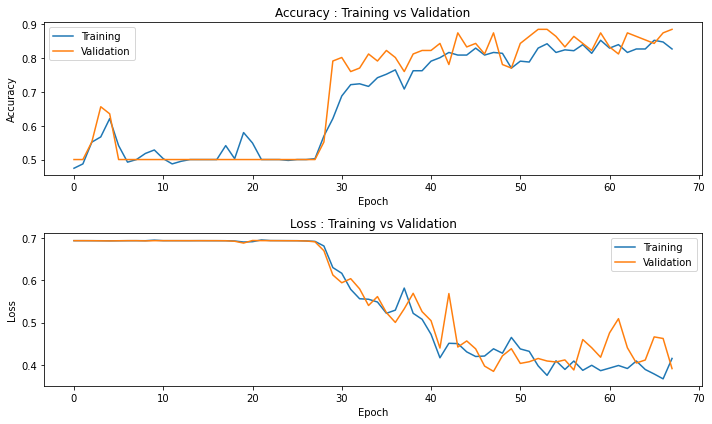

In [229]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

#### 4) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [230]:
y_pred = model.predict(x_test)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

4/4 [==============================] - 1s 132ms/step
[[47 13]
 [11 50]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        60
           1       0.79      0.82      0.81        61

    accuracy                           0.80       121
   macro avg       0.80      0.80      0.80       121
weighted avg       0.80      0.80      0.80       121



In [231]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 123ms/step - loss: 0.4794 - accuracy: 0.8017


[0.4794245958328247, 0.8016529083251953]

### (2) Transfer Learning
- **세부요구사항**
    * VGG16 모델은 1000개의 클래스를 분류하는 데 사용된 ImageNet 데이터셋을 기반으로 사전 학습된 가중치를 가지고 있습니다. 
        * 따라서 이 모델은 이미지 분류 문제에 대한 높은 성능을 보입니다.
        * 이 모델은 보통 전이학습(transfer learning)에서 기본적으로 사용되며, 특히 대규모 데이터셋이 없을 때는 기본 모델로 사용되어 fine-tuning을 수행합니다.
    * VGG16 함수로 부터 base_model 저장


In [ ]:
from tensorflow.keras.applications import VGG16

#### 1) VGG16 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 True로 설정하여 모델의 모든 레이어들이 fine-tuning에 대해 업데이트되도록 합니다.


In [ ]:
base_model = VGG16(                 )




#### 2) VGG16과 연결한 구조 설계
* VGG16을 불러와서 Flatten, Dense 등으로 레이어 연결하기

#### 3) 학습
- **세부요구사항**
    - 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
    - 데이터
        * Image Generator를 연결하거나
        * 기존 train, validation 셋을 이용해도 됩니다.
        - Early Stopping을 반드시 사용하세요.
        - 최적의 가중치를 모델에 적용하세요.

#### 4) 성능 평가